<a href="https://colab.research.google.com/github/zzzxxcc123/Ensemble---Boosting-Stacking/blob/main/Ensemble_Boosting%2C_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble (앙상볼)

## 1-1 데이터 전처리

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
air_df = pd.read_csv('/content/drive/MyDrive/KDT 시즌2/8. 머신러닝과 딥러닝/data/AirQualityUCI.csv')
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
air_df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [38]:
# 모든 데이터에 na가 포함 되어 있다면 제거
air_df = air_df.dropna()

In [39]:
# Date컬럼의 데이터를 datetime 형식으로 전환
# 날짜-월-년도 형식으로 유지
# Date 컬럼의 데이터를 datetime 형식으로 전환하고 직접 원래 컬럼에 적용
air_df['Date'] = pd.to_datetime(air_df.Date, format='%d-%m-%Y')

<ipython-input-39-95a5b42c99b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['Date'] = pd.to_datetime(air_df.Date, format='%d-%m-%Y')


In [40]:
# Month 파생변수 만들기
# Date컬럼에서 월을 추출
air_df['Month'] = air_df['Date'].dt.month

<ipython-input-40-e0b09b1b19e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['Month'] = air_df['Date'].dt.month


In [41]:
#hour 파생변수 만들기
air_df['Hour'] = air_df['Time'].str.split(':').str[0].fillna(0).astype(int)

<ipython-input-41-fd3ff10796ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['Hour'] = air_df['Time'].str.split(':').str[0].fillna(0).astype(int)


In [42]:
#Date, Time 컬럼 제거
air_df.drop(['Date', 'Time'], inplace = True, axis = 1)

<ipython-input-42-c9d6281438e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df.drop(['Date', 'Time'], inplace = True, axis = 1)


<Axes: >

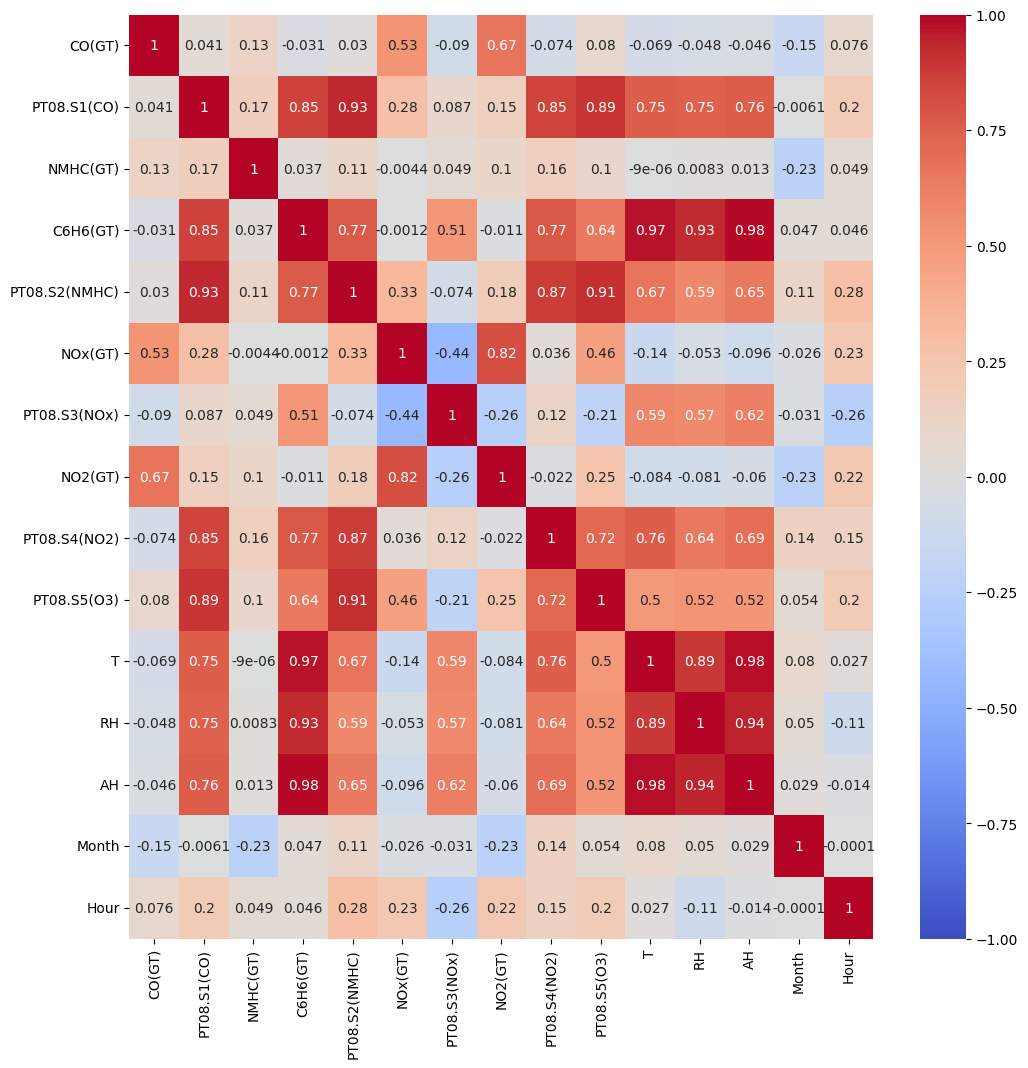

In [43]:
# heatmap을 통해 상관 관계 확인
plt.figure(figsize = (12, 12))
sns.heatmap(air_df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

In [44]:
# StandarScaler로 독립 변수(RH제외)를 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = air_df.drop('RH', axis = 1)
y = air_df['RH']

Xss = ss.fit_transform(x)

In [45]:
# train- test : 8:2 로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size = 0.2, random_state = 2023)

In [46]:
X_train.shape, X_test.shape

((7485, 14), (1872, 14))

## 1-2 Bosstinf(부스틴) - lightGBM

In [47]:
from lightgbm import LGBMRegressor

In [48]:
# 모델별 성능 확인
# 시각화 함수
from sklearn.metrics import mean_squared_error

my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']
def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)
  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors
  plot_predictions(name_, pred, actual)
  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse
  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10
  length = len(df)
  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])
  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)
  plt.show()

In [49]:
base_model = LGBMRegressor(random_state = 2023)

In [50]:
base_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2918
[LightGBM] [Info] Number of data points in the train set: 7485, number of used features: 14
[LightGBM] [Info] Start training from score 39.596406


LGBMRegressor(random_state=2023)

In [51]:
pred = base_model.predict(X_test)

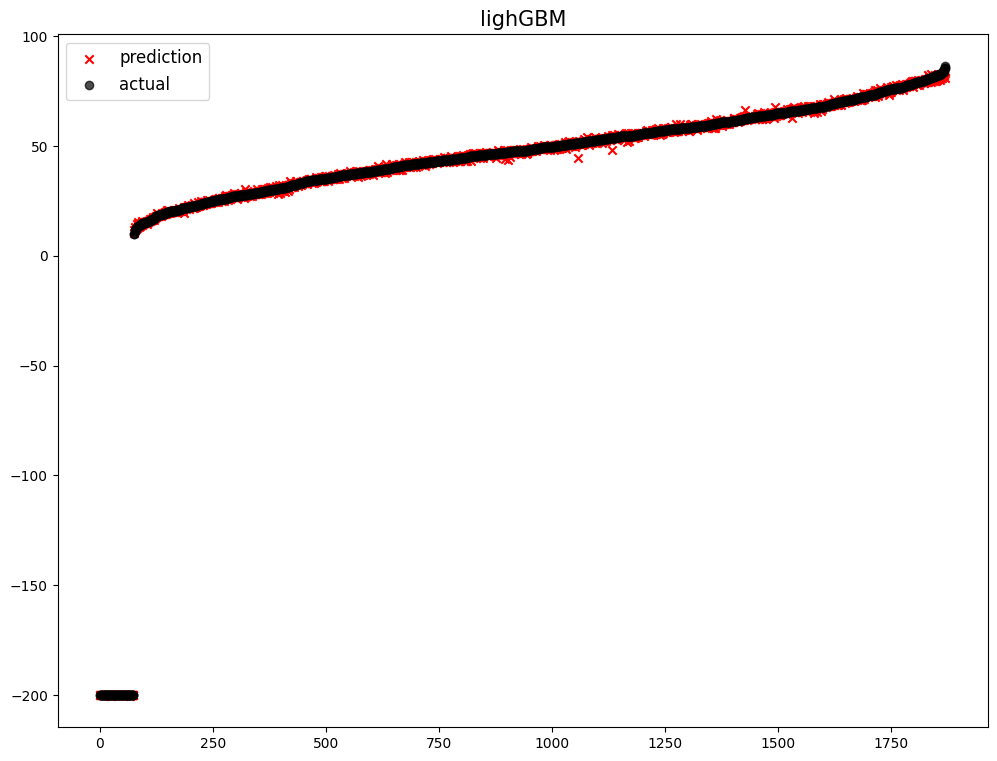

     model       mse
0  lighGBM  0.598591


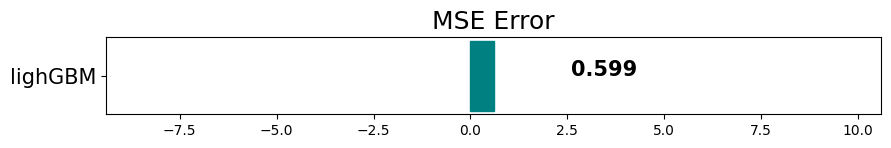

In [52]:
mse_eval('lighGBM', pred, y_test)

## 1-3 Stacking(스태킹)
일반 적인 스태킹

In [119]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_training , X_testing , y_training , y_testing = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4) #K최근접이웃
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)#랜덤포레스트
dt_clf = DecisionTreeClassifier() #결정트리
LGBM_clf = LGBMClassifier(n_estimators=100) #아다부스트

# 개별 모델들을 학습.
knn_clf.fit(X_training, y_training)
rf_clf.fit(X_training , y_training)
dt_clf.fit(X_training , y_training)
LGBM_clf.fit(X_training, y_training)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_testing)
rf_pred = rf_clf.predict(X_testing)
dt_pred = dt_clf.predict(X_testing)
LGBM_pred = LGBM_clf.predict(X_testing)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_testing, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_testing, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_testing, dt_pred)))
print('LGBM 정확도: {0:.4f} :'.format(accuracy_score(y_testing, LGBM_pred)))

[LightGBM] [Info] Number of positive: 290, number of negative: 165
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637363 -> initscore=0.563935
[LightGBM] [Info] Start training from score 0.563935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [120]:
# 시험데이터로 예측한 4가지 모델의 결과를 합침
pred = np.array([knn_pred, rf_pred, dt_pred, LGBM_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

# 최종 분류기 모델 생성
lr_final = LogisticRegression(C=10)

# 최종 분류기 학습 및 예측
lr_final.fit(pred, y_testing)
final = lr_final.predict(pred)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_testing , final)))

(4, 114)
(114, 4)
최종 메타 모델의 예측 정확도: 0.9825


CV(교차 검증 적용)

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [122]:
data = load_breast_cancer()

X_data = data.data
y_data = data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

In [123]:
#개별 모델들
svm = SVC(random_state=0)
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
lr = LogisticRegression()


#최종 모델
lgbm = LGBMClassifier()

In [129]:
from sklearn.model_selection import KFold, StratifiedKFold

def get_stacking_data(model, X_train, y_train, X_test, n_folds=5):
    kfold = KFold(n_splits = n_folds, random_state = 2023, shuffle = True)

    # 최종 모델에서 사용할 데이터 셋 셋팅(0 값으로)
    # 만약 shape가 (100, 10) 이었으면 폴드의 검증 과정에서 저장할 데이터는 (100, 1) 모양을 갖게 한다.
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    # test는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold개수) 만큼의 shape를 갖게 된다.
    # 그래서 해당 폴드마다 X_test의 예측 값을 해당 fold에 해당되는 열에 넣는다.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print("model : ", model.__class__.__name__)

    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_train_ = X_train[train_index]
        y_train_ = y_train[train_index]
        X_validation = X_train[valid_index]

        #학습
        model.fit(X_train_, y_train_)

        #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validation)로 예측 후 저장
        train_fold_predict[valid_index, :] = model.predict(X_validation).reshape(-1, 1)

        #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
        test_predict[:, cnt] = model.predict(X_test)

    #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
    test_predict_mean = np.mean(test_predict, axis =1).reshape(-1, 1)

    return train_fold_predict, test_predict_mean

In [130]:
svm_train, svm_test = get_stacking_data(svm, X_train, y_train, X_test)
rf_train, rf_test = get_stacking_data(rf, X_train, y_train, X_test)
lr_train, lr_test = get_stacking_data(lr, X_train, y_train, X_test)

model :  SVC
model :  RandomForestClassifier
model :  LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [131]:
new_X_train = np.concatenate((svm_train, rf_train, lr_train), axis = 1)
new_X_test = np.concatenate((svm_test, rf_test,lr_test), axis = 1)

In [134]:
lgbm.fit(new_X_train, y_train)
stack_pred = lgbm.predict(new_X_test)

print("정확도 : {0:.4f}".format(accuracy_score(stack_pred, y_test)))

[LightGBM] [Info] Number of positive: 290, number of negative: 165
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637363 -> initscore=0.563935
[LightGBM] [Info] Start training from score 0.563935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain